<a href="https://www.kaggle.com/code/adnansherwani/economics-analysis-using-pandas?scriptVersionId=121101818" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# USA Unemployement history using S&P 500

### The data is acquired from FRED using it's API. Data of unemployement per states is captured.

In [1]:
! pip install fredapi --quiet

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('max_columns', 500)
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
from fredapi import Fred

In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("FRED API")

## 1. Create the FRED object

In [4]:
fred = Fred(api_key= fred_key)
fred

## 2. Search for economic data

In [5]:
SP500 = fred.search('S&P', order_by = "popularity")
SP500.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-03-05,2023-03-05,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-03-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-03-03 09:33:09-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-03-05,2023-03-05,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-02-28 08:02:02-06:00,92,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-03-05,2023-03-05,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-03-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-03-03 09:33:13-06:00,84,This data represents the effective yield of th...
SP500,SP500,2023-03-05,2023-03-05,S&P 500,2013-03-04,2023-03-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-03-03 19:10:52-06:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-03-05,2023-03-05,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-02-28 08:02:04-06:00,82,"For more information regarding the index, plea..."


## 3. Pull and plot the series data

In [6]:
sp500 = fred.get_series(series_id = 'SP500')

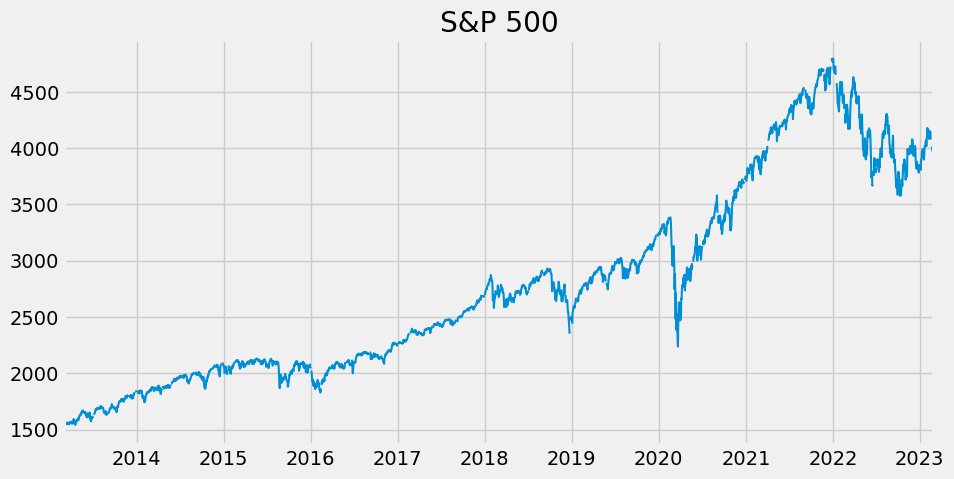

In [7]:
sp500.plot(figsize = (10,5), title = 'S&P 500', lw = 1.5)
plt.show()

## 4. Pull and join multiple data

In [8]:
unemp_results = fred.search('unemployement')
unemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-03-05,2023-03-05,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-03-05,2023-03-05,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 07:43:02-06:00,58,The unemployment rate represents the number of...
NROU,NROU,2023-03-05,2023-03-05,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,69,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2023-03-05,2023-03-05,Unemployment Level,1948-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:05-06:00,69,The series comes from the 'Current Population ...
CCSA,CCSA,2023-03-05,2023-03-05,Continued Claims (Insured Unemployment),1967-01-07,2023-02-18,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-03-02 07:41:03-06:00,72,"Continued claims, also referred to as insured ..."


In [9]:
unrate = fred.get_series(series_id = 'UNRATE')

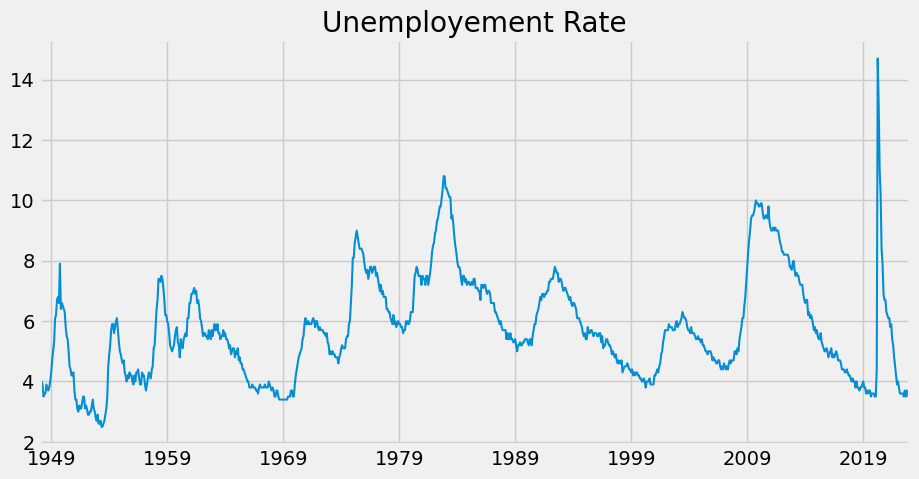

In [10]:
unrate.plot(figsize = (10,5), title = 'Unemployement Rate', lw  = 1.5)
plt.show()

# 5. Unemployement Rate for different States

In [11]:
unemp_df = fred.search('unemployement rate state', filter=('frequency', 'Monthly'))
unemp_df.query("seasonal_adjustment	 == 'Seasonally Adjusted' and units == 'Percent'", inplace = True)
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df = unemp_df.loc[unemp_df['id'].str.contains('UR')]

In [12]:
unemp_df.columns
len(unemp_df.index)
unemp_df.index

Index(['CAUR', 'FLUR', 'TXUR', 'NYUR', 'PAUR', 'OHUR', 'NCUR', 'ALUR', 'ILUR',
       'MIUR', 'TNUR', 'GAUR', 'MAUR', 'COUR', 'MNUR', 'KYUR', 'SCUR', 'VAUR',
       'WIUR', 'WAUR', 'NJUR', 'WVUR', 'INUR', 'MOUR', 'NMUR', 'ORUR', 'AKUR',
       'NVUR', 'IAUR', 'AZUR', 'LAUR', 'ARUR', 'UTUR', 'HIUR', 'NDUR', 'OKUR',
       'MDUR', 'SDUR', 'MTUR', 'CTUR', 'KSUR', 'MSUR', 'IDUR', 'WYUR', 'NEUR',
       'MEUR', 'RIUR', 'NHUR', 'DCUR', 'PRUR', 'DEUR', 'VTUR', 'CMWRUR',
       'CNERUR', 'CWSTUR', 'CSOUUR', 'CNEWUR'],
      dtype='object', name='series id')

# 6. Concatinate all the unemployement states data & change the column names to IDs to state names.

In [13]:
all_results = []

for ids in unemp_df.index:
    results = fred.get_series(series_id=ids)
    results = results.to_frame(name = ids)
    all_results.append(results)

unemp_results= pd.concat(all_results, axis=1)
unemp_results.drop(['CMWRUR','CNERUR', 'CSOUUR', 'CNEWUR'], axis=1, inplace = True)
unemp_states = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
unemp_results.rename(columns= unemp_states, inplace=True)
unemp_results.drop([' the District of Columbia'], axis=1, inplace = True)

In [14]:
px.line(unemp_results)

# 7. Pull Participation data from FRED

In [15]:
part_df = fred.search('Participation Rate', order_by='popularity', filter=('frequency', 'Monthly'))
part_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'", inplace = True)
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate')]
part_df = part_df.loc[part_df['observation_start'] >= '1976-1-1']
part_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LNS11327662,LNS11327662,2023-03-05,2023-03-05,Labor Force Participation Rate - Bachelor's De...,1992-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:26-06:00,35,The series comes from the 'Current Population ...
LBSSA12,LBSSA12,2023-03-05,2023-03-05,Labor Force Participation Rate for Florida,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:03-06:00,31,A state's labor-force participation rate is th...
LNS11327660,LNS11327660,2023-03-05,2023-03-05,Labor Force Participation Rate - High School G...,1992-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:31-06:00,28,The series comes from the 'Current Population ...
LBSSA27,LBSSA27,2023-03-05,2023-03-05,Labor Force Participation Rate for Minnesota,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:01-06:00,27,A state's labor-force participation rate is th...
LBSSA55,LBSSA55,2023-03-05,2023-03-05,Labor Force Participation Rate for Wisconsin,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:02-06:00,26,A state's labor-force participation rate is th...


In [16]:
fred.get_series(series_id = 'LBSSA55')

1976-01-01    65.6
1976-02-01    65.5
1976-03-01    65.4
1976-04-01    65.4
1976-05-01    65.5
              ... 
2022-08-01    65.9
2022-09-01    65.6
2022-10-01    65.3
2022-11-01    64.9
2022-12-01    64.7
Length: 564, dtype: float64

In [17]:
part_results = []
for i in part_df.index:
    part_series = fred.get_series(series_id = i)
    part_series = part_series.to_frame(name=i)
    part_results.append(part_series)

part_results = pd.concat(part_results, axis =1).drop(['LNS11327662', 'LNS11327660', 'LNS11327689', 'LNS11327659'], axis = 1)
part_results.drop(index='2023-01-01', axis = 0, inplace = True)
part_title = part_df['title'].str.replace('Labor Force Participation Rate for', '').to_dict()
part_results = part_results.rename(columns = part_title)
part_results.drop([' District Of Columbia'], axis=1, inplace=True)

In [18]:
part_results.head()

,Florida,Minnesota,Wisconsin,Massachusetts,California,Kentucky,Georgia,New York,Texas,North Carolina,Pennsylvania,Tennessee,Michigan,New Mexico,Illinois,Maine,West Virginia,Utah,Indiana,Iowa,Alaska,Kansas,Maryland,Arizona,Virginia,Ohio,South Dakota,Oregon,Idaho,Montana,Oklahoma,New Jersey,Mississippi,Connecticut,Nebraska,South Carolina,Colorado,Alabama,Vermont,Washington,Louisiana,North Dakota,Missouri,Wyoming,Nevada,New Hampshire,Rhode Island,Delaware,Arkansas,Hawaii
1976-01-01,55.8,65.6,65.6,64.8,62.6,60.5,63.7,58.0,63.8,66.5,58.4,59.6,61.6,60.8,63.0,62.1,52.5,62.8,64.0,64.4,69.0,65.1,64.3,59.5,65.9,61.7,64.6,62.9,63.0,62.7,59.3,61.5,58.8,64.2,64.9,65.3,67.2,57.0,63.6,60.9,56.8,62.6,60.5,65.3,71.3,65.9,63.8,62.7,57.9,69.9
1976-02-01,55.7,65.5,65.5,64.7,62.4,60.3,63.6,58.0,63.5,66.3,58.3,59.4,61.5,60.5,63.0,61.9,52.4,62.6,63.9,64.3,68.4,65.0,64.2,59.2,65.8,61.7,64.4,62.7,62.8,62.5,59.2,61.4,58.6,64.1,64.9,65.2,67.0,56.9,63.4,60.7,56.6,62.4,60.3,64.9,70.8,65.6,63.7,62.5,57.8,69.6
1976-03-01,55.5,65.4,65.4,64.6,62.2,60.2,63.5,58.0,63.4,66.2,58.3,59.3,61.5,60.3,62.9,61.9,52.3,62.5,63.8,64.2,67.8,64.9,64.1,59.1,65.6,61.7,64.4,62.5,62.7,62.4,59.1,61.4,58.5,64.0,64.8,65.0,66.8,56.8,63.2,60.6,56.5,62.3,60.3,64.7,70.5,65.6,63.6,62.5,57.7,69.6
1976-04-01,55.5,65.4,65.4,64.6,62.2,60.1,63.5,58.0,63.5,66.2,58.3,59.3,61.6,60.3,62.9,61.8,52.3,62.5,63.8,64.1,67.9,65.0,64.1,59.1,65.5,61.6,64.3,62.4,62.7,62.3,59.0,61.5,58.5,64.1,64.8,64.9,66.6,56.8,63.5,60.6,56.4,62.5,60.4,64.9,70.4,65.7,63.7,62.4,57.7,69.4
1976-05-01,55.4,65.5,65.5,64.6,62.3,60.1,63.6,58.1,63.6,66.3,58.3,59.4,61.7,60.3,63.0,61.7,52.2,62.6,63.9,64.1,67.9,65.1,64.1,59.1,65.4,61.6,64.3,62.5,62.8,62.2,59.0,61.6,58.5,64.3,64.8,64.7,66.5,56.8,63.6,60.7,56.4,62.6,60.6,65.2,70.5,66.0,63.6,62.4,57.7,69.3


In [19]:
px.line(part_results, title='Participation Rate by States')

# 8. Analysing april 2020 data.

In [20]:
unemp_results.drop([' Puerto Rico'], axis =1, inplace = True)


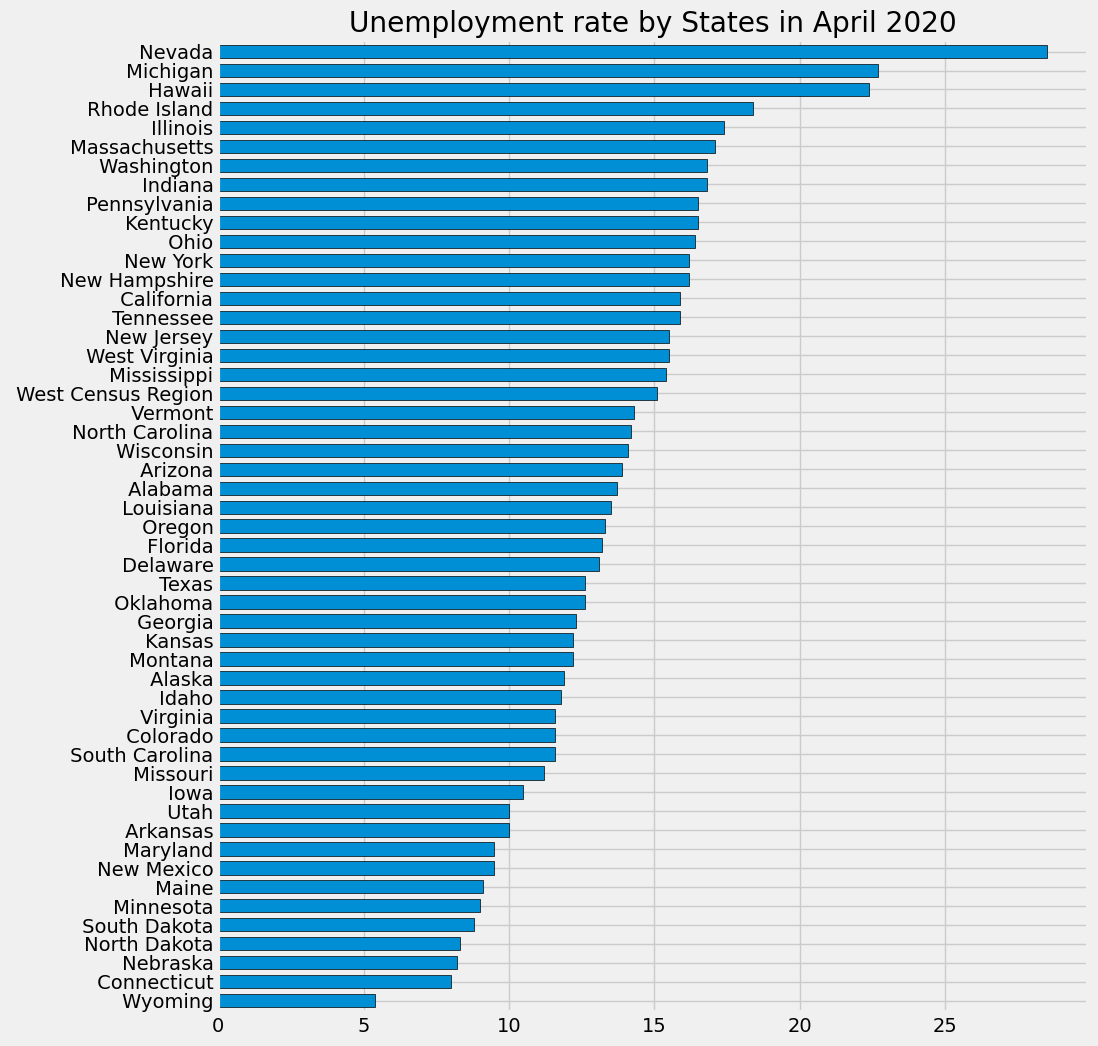

In [21]:
ax = unemp_results.loc[unemp_results.index == '2020-04'].T \
.sort_values('2020-04-01') \
.plot(kind='barh', figsize=(10,12), title = 'Unemployment rate by States in April 2020' \
      , edgecolor = 'black', width=0.7 )

ax.legend().remove()
plt.show()

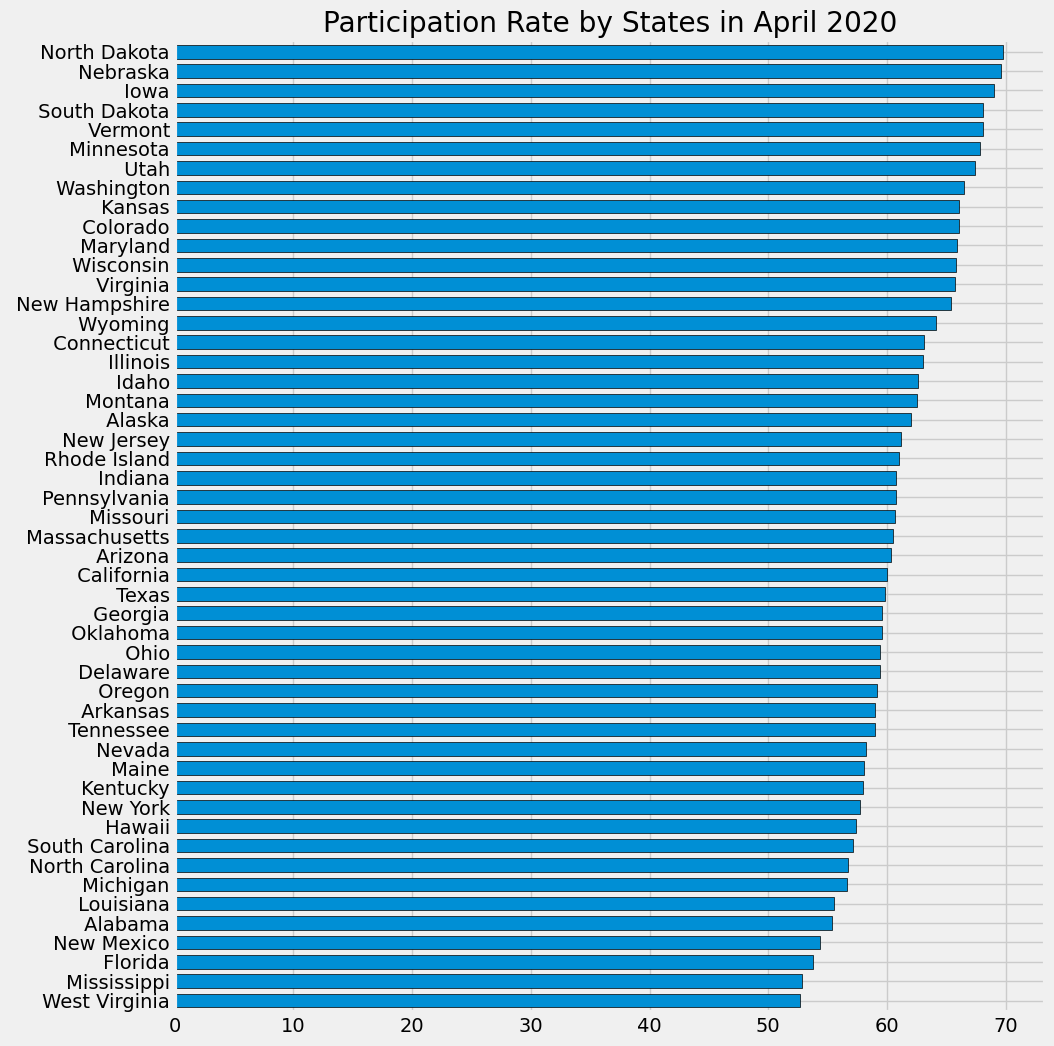

In [22]:
ax = part_results.loc[part_results.index == '2020-04-01'].T \
.sort_values('2020-04-01') \
.plot(kind='barh', figsize=(10,12), title = 'Participation Rate by States in April 2020', width = 0.7, edgecolor='black')

ax.legend().remove()
plt.show()

# 9. Analysing Participation VS Unemployement Data from year 2019-2022

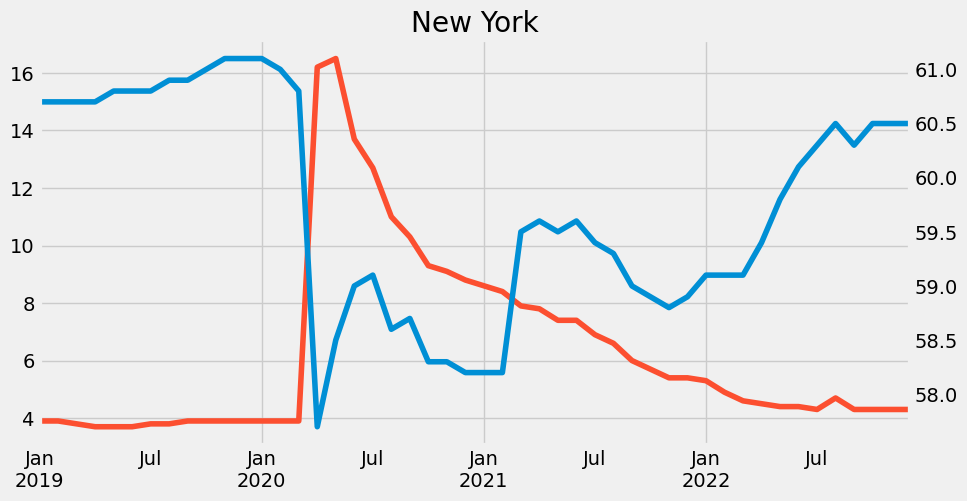

In [23]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_results.query('index >= 2019 and index < 2023')[' New York'] \
.plot(kind='line',ax=ax, figsize=(10,5), label='Unemployement Rate', color=color_pal[1])
part_results.query('index >= 2019 and index < 2023')[' New York'] \
.plot(ax=ax2, label='Participation Rate')
ax2.grid(False)
ax.set_title('New York')
plt.show()

In [24]:
# fig, axs = plt.subplots(10,5, figsize=(30,30), sharex = True)
# axs = axs.flatten()

# i = 0
# for states in unemp_results.columns:
#     ax2 = axs[i].twinx()
#     unemp_results.query("index >= 2019 and index < 2023")[states] \
#     .plot(ax=axs[i], label='Unemplotement Rate')
#     part_results.query("index >= 2019 and index < 2023")[states] \
#     .plot(ax=ax2, color=color_pal[1], label='Participation Rate')
#     ax2.grid(False)
#     axs[i].set_title(states)
#     i += 1
    
# plt.tight_layout()
# plt.show()


In [25]:
part_results.shape

(564, 50)

In [26]:
unemp_results.shape

(564, 51)